<a href="https://colab.research.google.com/github/MatheusAguiar/Calculadora/blob/master/RedesNeuraisMulticlass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import cv2
import numpy as np
import os
import zipfile
from google.colab.patches import cv2_imshow
import tensorflow as tf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


#Extração dos pixels das imagens

from google.colab import drive
drive.mount('/content/drive')

path = '/content/drive/MyDrive/TCC/BASE.zip'
zip_object = zipfile.ZipFile(file = path, mode = 'r')
zip_object.extractall('./')
zip_object.close()

diretorio = '/content/BASE'
arquivos = [os.path.join(diretorio, f) for f in sorted(os.listdir(diretorio))]
print(arquivos)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
['/content/BASE/abraham (1).jpg', '/content/BASE/abraham (10).jpg', '/content/BASE/abraham (100).jpg', '/content/BASE/abraham (101).jpg', '/content/BASE/abraham (102).jpg', '/content/BASE/abraham (103).jpg', '/content/BASE/abraham (104).jpg', '/content/BASE/abraham (105).jpg', '/content/BASE/abraham (106).jpg', '/content/BASE/abraham (107).jpg', '/content/BASE/abraham (108).jpg', '/content/BASE/abraham (109).jpg', '/content/BASE/abraham (11).jpg', '/content/BASE/abraham (110).jpg', '/content/BASE/abraham (111).jpg', '/content/BASE/abraham (112).jpg', '/content/BASE/abraham (113).jpg', '/content/BASE/abraham (114).jpg', '/content/BASE/abraham (115).jpg', '/content/BASE/abraham (116).jpg', '/content/BASE/abraham (117).jpg', '/content/BASE/abraham (118).jpg', '/content/BASE/abraham (119).jpg', '/content/BASE/abraham (12).jpg', '/content/BASE/abraham (120).jpg', 

In [2]:
largura, altura = 128,128

In [3]:
imagens = []
classes = []

In [ ]:
for imagem_caminho in arquivos:
  try:
    imagem = cv2.imread(imagem_caminho)
    (height, width) = imagem.shape[:3]
  except: 
     continue
  
  imagem = cv2.resize(imagem, (largura, altura))
  imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)
  #cv2_imshow(imagem)

  imagem = imagem.ravel()
  #print(imagem.shape)

  imagens.append(imagem)
  nome_imagem = os.path.basename(os.path.normpath(imagem_caminho))
  #print(nome_imagem)

  if nome_imagem.startswith('a'):
    classe = 0
  elif nome_imagem.startswith('b'):
    classe = 1 
  else:
    classe = 2
  

  classes.append(classe)
  #print(classe)

x = np.asarray(imagens)
y = np.asarray(classes)

#x.shape

sns.countplot(y)

In [55]:
x[0].max(), x[0].min()

(234, 1)

In [56]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x = scaler.fit_transform(x) 
x[0].max(), x[0].min()


(0.9354838709677419, 0.00392156862745098)

In [57]:
from sklearn.model_selection import train_test_split
x_train, x_teste, y_train, y_teste = train_test_split(x,y, test_size=0.30)


In [58]:
#N_class=6  #define o numero de classes (saida da rede)
#model = tf.keras.models.Sequential()
#model.add(tf.keras.layers.Dense(input_shape=(16384,), units = 2731, activation='relu'))
#model.add(tf.keras.layers.Dense(units = 2731, activation='relu'))
#model.add(tf.keras.layers.Dense(1, activation='softmax'))

N_class=3  #define o numero de classes (saida da rede)
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(16384,1)),
    tf.keras.layers.Dense(5462.333, activation='relu'),
    tf.keras.layers.Dense(N_class, activation='softmax')
])


In [59]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 16384)             0         
                                                                 
 dense_6 (Dense)             (None, 5462)              89494870  
                                                                 
 dense_7 (Dense)             (None, 3)                 16389     
                                                                 
Total params: 89,511,259
Trainable params: 89,511,259
Non-trainable params: 0
_________________________________________________________________


In [74]:
opt=tf.keras.optimizers.Adam(learning_rate=0.002)
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=50)

Epoch 1/50
50/50 [==============================] - 2s 38ms/step - loss: 0.5293 - accuracy: 0.8625
Epoch 2/50
50/50 [==============================] - 2s 41ms/step - loss: 0.2472 - accuracy: 0.9237
Epoch 3/50
50/50 [==============================] - 2s 36ms/step - loss: 0.2367 - accuracy: 0.9275
Epoch 4/50
50/50 [==============================] - 2s 36ms/step - loss: 0.1630 - accuracy: 0.9563
Epoch 5/50
50/50 [==============================] - 2s 36ms/step - loss: 0.1848 - accuracy: 0.9450
Epoch 6/50
50/50 [==============================] - 2s 36ms/step - loss: 0.5686 - accuracy: 0.8100
Epoch 7/50
50/50 [==============================] - 2s 36ms/step - loss: 0.2443 - accuracy: 0.9156
Epoch 8/50
50/50 [==============================] - 2s 36ms/step - loss: 0.2297 - accuracy: 0.9287
Epoch 9/50
50/50 [==============================] - 2s 36ms/step - loss: 0.1838 - accuracy: 0.9450
Epoch 10/50
50/50 [==============================] - 2s 36ms/step - loss: 0.2071 - accuracy: 0.9306
Epoch 11/

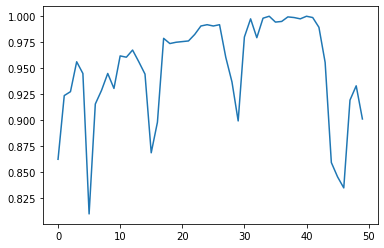

In [75]:
plt.plot(history.history['accuracy']);

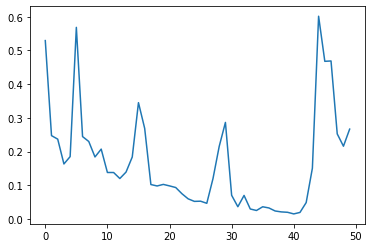

In [76]:
plt.plot(history.history['loss']);

In [ ]:
pred = model.predict(x_teste)
test_loss, test_acc = model.evaluate(x_teste,  y_teste)
print('\n accuracia dos dados de teste: ', test_acc)

#encontra a classe de maior probabilidade
labels_pred=np.argmax(pred,axis=1)
#mostra 15 resultados esperados e os alcançados lado a lado
print('data and pred = \n',np.concatenate(
    (y_teste[None].T[0:100], labels_pred[None].T[0:100]),axis=1))


In [86]:
from sklearn.metrics import confusion_matrix
import itertools

y_test_evt_multi = []
y_pred_multi = []

for y_sample, pred_sample in zip (y_teste,pred): 
  for i in range(y_sample):
    if y_sample[i] == 1:
      y_test_evt_multi.append(i)
      break
  check = False
  for i in range(len(pred_sample)):    
    if pred_sample[i] == 1:
      y_pred_multi.append(i)
      check = True
      break
  if not check:
    y_pred_multi.append(len(pred_sample))

cnf_matrix = confusion_matrix(y_test_evt_multi, y_pred_multi)
print(cnf_matrix)




IndexError: ignored

In [80]:
plot_confusion_matrix(cnf_matrix, classes=['Abraham', 'Bart', 
                                                              'Lisa'],
                      title='Confusion matrix com normalização', normalize=True)

plt.show()

TypeError: ignored

# 2ª Abordagem 

In [2]:
arquivos = [os.path.join(diretorio, f) for f in sorted(os.listdir(diretorio))]
print(arquivos)

['/content/BASE/abraham (1).jpg', '/content/BASE/abraham (10).jpg', '/content/BASE/abraham (100).jpg', '/content/BASE/abraham (101).jpg', '/content/BASE/abraham (102).jpg', '/content/BASE/abraham (103).jpg', '/content/BASE/abraham (104).jpg', '/content/BASE/abraham (105).jpg', '/content/BASE/abraham (106).jpg', '/content/BASE/abraham (107).jpg', '/content/BASE/abraham (108).jpg', '/content/BASE/abraham (109).jpg', '/content/BASE/abraham (11).jpg', '/content/BASE/abraham (110).jpg', '/content/BASE/abraham (111).jpg', '/content/BASE/abraham (112).jpg', '/content/BASE/abraham (113).jpg', '/content/BASE/abraham (114).jpg', '/content/BASE/abraham (115).jpg', '/content/BASE/abraham (116).jpg', '/content/BASE/abraham (117).jpg', '/content/BASE/abraham (118).jpg', '/content/BASE/abraham (119).jpg', '/content/BASE/abraham (12).jpg', '/content/BASE/abraham (120).jpg', '/content/BASE/abraham (121).jpg', '/content/BASE/abraham (122).jpg', '/content/BASE/abraham (123).jpg', '/content/BASE/abraham (

In [8]:
from absl.logging import exception
export = 'boca, camisa, oculos, camiseta, calcao, tenis, cabelo, blusa, saia, classe\n'
mostrar_imagens = False
caracteristicas = []

for imagem_caminho in arquivos:
  #print(imagem_caminho)
  try:
    imagem_original = cv2.imread(imagem_caminho)
    (height, width) = imagem_original.shape[:2]
  except:
    continue
  #cv2_imshow(imagem_original)

  imagem_alterada = imagem_original.copy()
  imagem_caracteristicas = []
  imagem_nome = os.path.basename(os.path.normpath(imagem_caminho))
  boca = 0

  #print(imagem_nome)

  if imagem_nome.startswith('a'):
    classe = 0
  elif imagem_nome.startswith('b'):
    classe = 1
  else:
    classe = 2

  for altura in range(0, height):
    for largura in range(0, width):
      azul = imagem_alterada.item(altura, largura, 0)
      verde = imagem_alterada.item(altura, largura, 1)
      vermelho = imagem_alterada.item(altura, largura, 2)

      #Abhram - marrom da boca
      if(azul >= 73 and azul <= 140 and verde >= 141 and verde <= 185 and vermelho >= 151 and vermelho <= 200):
        imagem_alterada[altura, largura] = [0,255,255]
        boca += 1

  boca = round((boca / (height * width)) * 100, 9)

  imagem_caracteristicas.append(boca)

  caracteristicas.append(imagem_caracteristicas)

  print('Abhram boca ', imagem_caracteristicas[0])





Abhram boca  5.647369124
Abhram boca  0.655643858
Abhram boca  1.332966079
Abhram boca  0.785423344
Abhram boca  0.762052618
Abhram boca  0.712807158
Abhram boca  0.187800481
Abhram boca  1.358840812
Abhram boca  1.461505075
Abhram boca  1.708984375
Abhram boca  2.069561298
Abhram boca  0.55088141
Abhram boca  1.495788323
Abhram boca  5.068943643
Abhram boca  1.094250801
Abhram boca  3.485576923
Abhram boca  2.241085737
Abhram boca  2.588307959
Abhram boca  2.453091613
Abhram boca  0.298394097
Abhram boca  1.412259615
Abhram boca  2.323717949
Abhram boca  1.413094284
Abhram boca  7.527043269
Abhram boca  3.82946047
Abhram boca  2.196848291
Abhram boca  2.55992922
Abhram boca  3.324485844
Abhram boca  1.981503739
Abhram boca  0.238715278
Abhram boca  3.3203125
Abhram boca  1.295405983
Abhram boca  1.214443109
Abhram boca  2.251101763
Abhram boca  0.860677083
Abhram boca  0.877236912
Abhram boca  3.862847222
Abhram boca  2.673026843
Abhram boca  0.427350427
Abhram boca  1.960219685
Abhra

KeyboardInterrupt: ignored